In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from sklearn import preprocessing

In [2]:
PBMC_path = pathlib.Path("../../Data/clean/Plate2/nELISA_plate_430420_PBMC.csv")


manual_cluster_1_path = pathlib.Path(
    "../../Data/clean/Plate2/Manual_Treatment_Clusters_1.csv"
)

manual_cluster_2_path = pathlib.Path(
    "../../Data/clean/Plate2/Manual_Treatment_Clusters_2.csv"
)

PBMC_df = pd.read_csv(PBMC_path)

manual_clusters_1 = pd.read_csv(manual_cluster_1_path)
manual_clusters_2 = pd.read_csv(manual_cluster_2_path)

In [3]:
# select data only columns and make floats
nELISA_data_values = PBMC_df.filter(like="NSU", axis=1)
nELISA_data_values = nELISA_data_values.astype("float")
nELISA_data_values.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU]
0,0.398325,-0.130139,8.797693,-0.445542,0.371358,-0.462473,1.422635,-1.915471,-0.748352,-1.583011,...,-1.065390,-0.314291,0.171604,-0.137741,0.373863,-1.042447,-1.016304,-0.289143,0.373108,-0.804121
1,-0.835343,-0.174790,7.975378,-0.747735,-2.742042,-0.735577,-2.106887,-0.153780,-0.750152,-0.241556,...,-0.766995,0.190291,-1.499028,-0.660653,-0.594824,-0.400520,-0.100588,-1.055132,-0.020319,-0.946662
2,-0.933929,-1.258131,7.642998,-0.720992,-4.155766,1.830996,1.389517,-0.785248,-0.262083,-1.058364,...,0.547156,-0.793964,0.592818,-1.207418,-0.318222,0.187477,-1.584273,-0.015301,-1.393639,-2.013903
3,-0.965939,0.443343,4.022308,-1.913187,1.560739,-1.219594,0.139052,0.110671,0.179028,-0.604800,...,-1.639177,0.494727,1.050084,-2.030229,0.663452,-0.645759,1.403077,-1.946008,-1.806517,-0.911292
4,-0.961577,-0.006246,11.143199,-0.869969,-0.589156,0.173679,1.374521,-1.267405,0.044353,-0.098963,...,-0.899452,-0.197758,-0.858524,0.211425,-0.734540,-0.938241,-0.976583,0.352800,0.472133,-1.347747


In [4]:
# normalize data via max value in each column
max_values = nELISA_data_values.max()  # find max value in each column
nELISA_data_values_sensor_max_norm = nELISA_data_values.div(
    max_values
)  # divide each value in each column by max value in that column
nELISA_data_values_sensor_max_norm.head()
# min max normalization via sklearn

# normalize data via min max normalization
min_max_scaler = preprocessing.MinMaxScaler()
nELISA_data_values_min_max_norm = min_max_scaler.fit_transform(nELISA_data_values)
nELISA_data_values_min_max_norm = pd.DataFrame(
    nELISA_data_values_min_max_norm, columns=nELISA_data_values.columns
)
nELISA_data_values_min_max_norm.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU]
0,0.097710,0.461685,0.270477,0.514695,0.479281,0.270494,0.708849,0.134432,0.350986,0.216932,...,0.386063,0.469875,0.395392,0.560129,0.504521,0.490444,0.258834,0.238358,0.524276,0.250670
1,0.064513,0.451181,0.246274,0.471026,0.269795,0.204498,0.247611,0.322087,0.350642,0.349237,...,0.454460,0.570146,0.032391,0.476656,0.315426,0.589522,0.381170,0.168645,0.455092,0.228752
2,0.061860,0.196318,0.236491,0.474891,0.174672,0.824721,0.704521,0.254823,0.443939,0.268677,...,0.755683,0.374554,0.486915,0.389375,0.369421,0.680276,0.182956,0.263281,0.213596,0.064645
3,0.060998,0.596601,0.129926,0.302610,0.559309,0.087533,0.541110,0.350256,0.528260,0.313411,...,0.254542,0.630644,0.586271,0.258029,0.561051,0.551671,0.582053,0.087565,0.140992,0.234191
4,0.061116,0.490832,0.339510,0.453362,0.414653,0.424223,0.702561,0.203464,0.502516,0.363301,...,0.424098,0.493033,0.171562,0.615867,0.288153,0.506528,0.264141,0.296782,0.541689,0.167078


In [5]:
# drop columns that are named with NSU
Metadata = PBMC_df.drop(PBMC_df.filter(like="NSU", axis=1), axis=1)
Metadata = Metadata.drop(PBMC_df.filter(like="pgML", axis=1), axis=1)

In [6]:
analysis_df = pd.concat([Metadata, nELISA_data_values_min_max_norm], axis=1)

In [7]:
# add manual clusters columns to dataframe
nELISA_plate_430420 = pd.merge(
    analysis_df,
    manual_clusters_2,
    on=(
        "inducer1",
        "inducer1_concentration_value",
        "inhibitor",
        "inhibitor_concentration_value",
        "inducer2",
        "inducer2_concentration_value",
    ),
    how="inner",
)

In [8]:
# dose column merge
conditions = [
    (nELISA_plate_430420["inducer2"].isnull()),
    nELISA_plate_430420["inducer2"].notnull(),
]

results = [
    (
        nELISA_plate_430420["inducer1"]
        + "_"
        + nELISA_plate_430420["inducer1_concentration"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor_concentration"].astype(str)
    ).astype(str),
    (
        nELISA_plate_430420["inducer1"]
        + "_"
        + nELISA_plate_430420["inducer1_concentration"].astype(str)
        + "_"
        + nELISA_plate_430420["inducer2"]
        + "_"
        + nELISA_plate_430420["inducer2_concentration"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor"].astype(str)
        + "_"
        + nELISA_plate_430420["inhibitor_concentration"].astype(str)
    ).astype(str),
]
nELISA_plate_430420["Treatment_and_Dose"] = np.select(conditions, results)


results = [
    (nELISA_plate_430420["inducer1"]).astype(str),
    (nELISA_plate_430420["inducer1"] + "_" + nELISA_plate_430420["inducer2"]).astype(
        str
    ),
]
nELISA_plate_430420["Treatments"] = np.select(conditions, results)

In [9]:
# select rows that contain 'Thapsigargin_10 µM_DMSO_0.03%' from Treatment_and_Dose column
nELISA_plate_430420 = nELISA_plate_430420[
    nELISA_plate_430420["Treatments"].isin(
        [
            "Thapsigargin",
            "LPS",
            "DMSO",
        ]
    )
]

# select rows that contain 'Thapsigargin_10 µM_DMSO_0.03%' from Treatment_and_Dose column
nELISA_plate_430420 = nELISA_plate_430420[
    nELISA_plate_430420["inhibitor"].isin(["DMSO"])
]

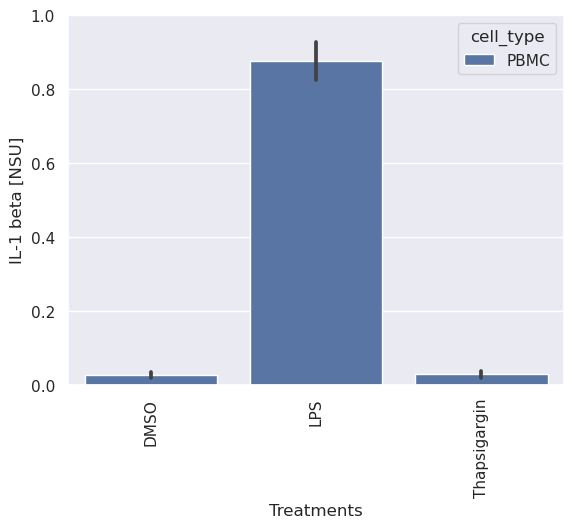

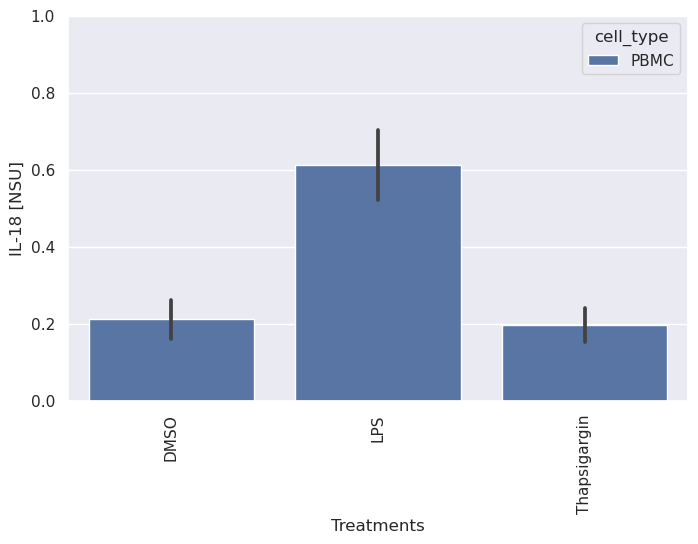

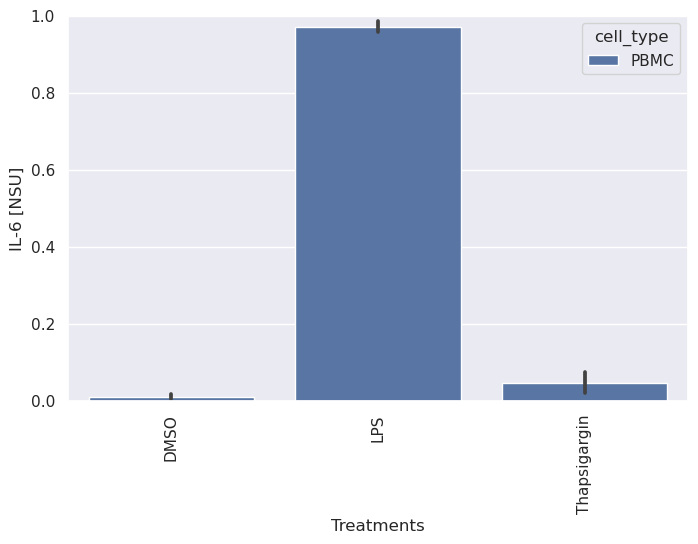

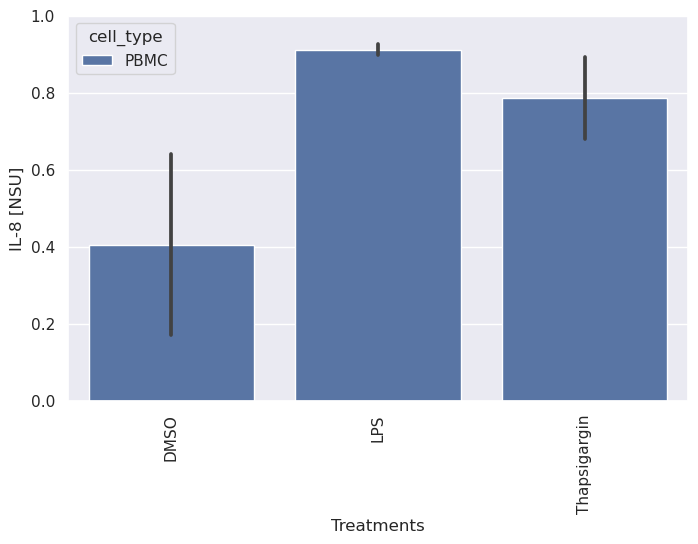

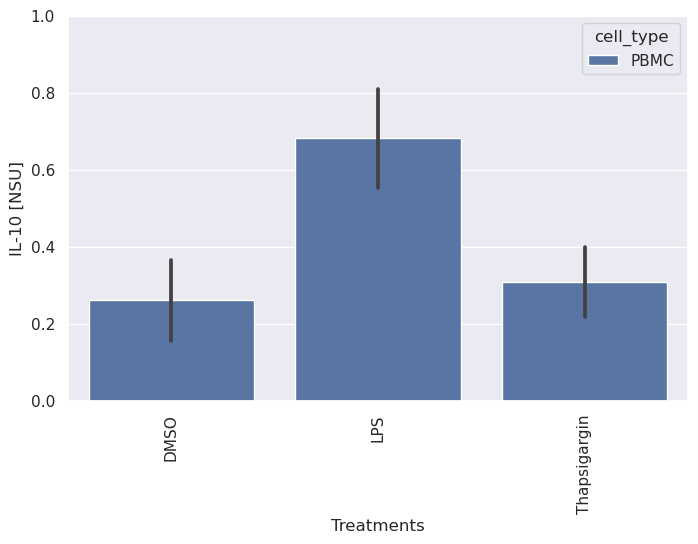

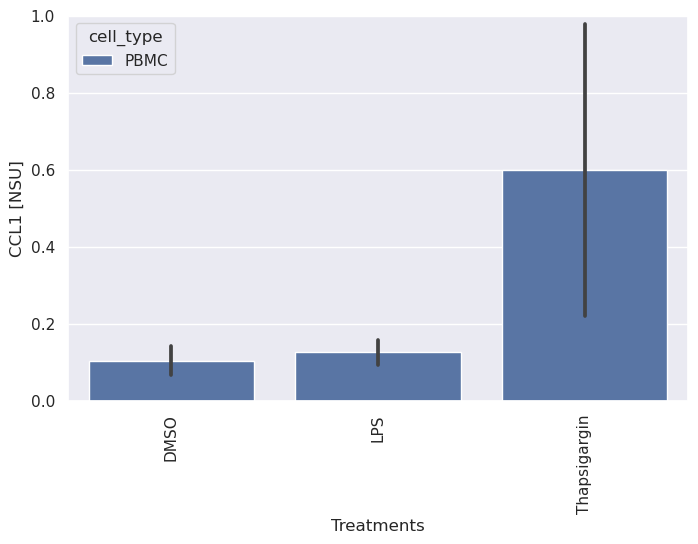

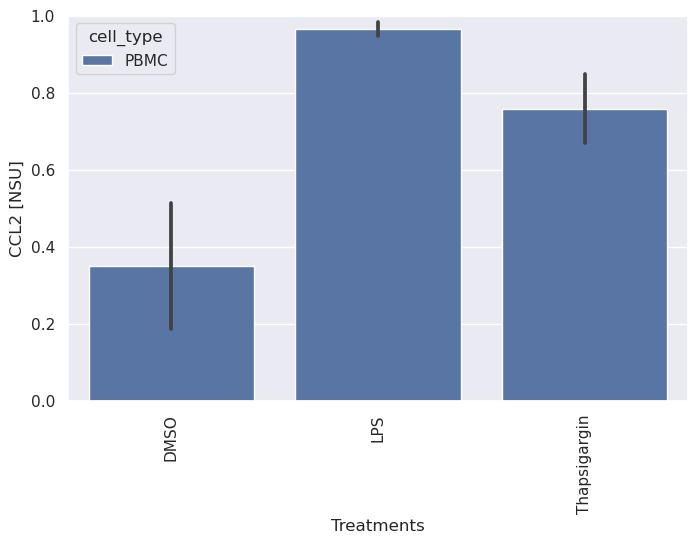

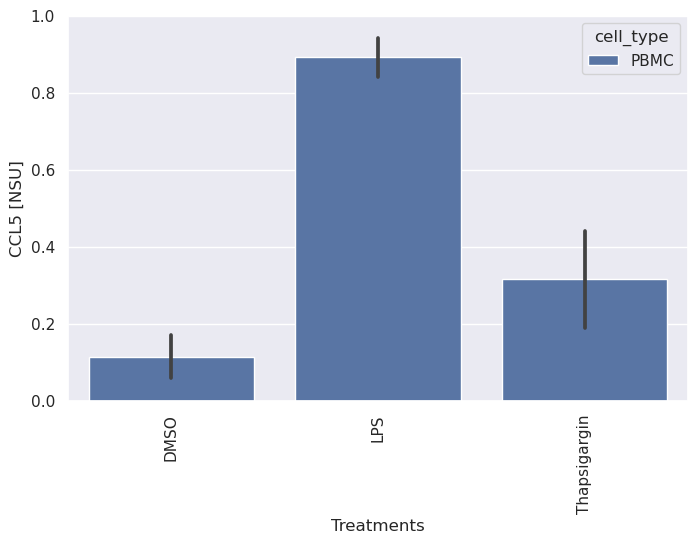

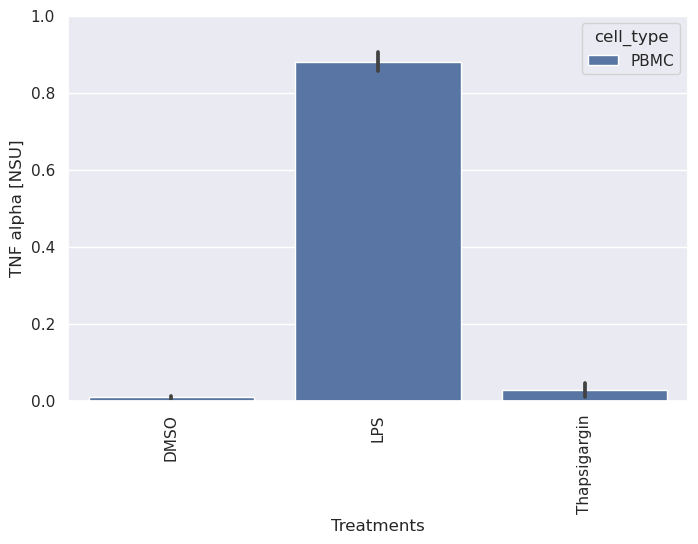

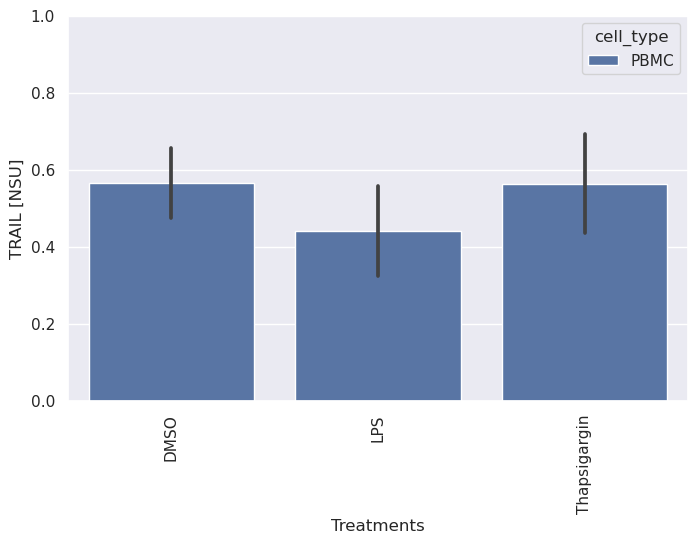

In [10]:
def plot_cytokines(df, cytokine, cell_type):
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize": (8, 5)})
    # plot a bar chart
    sns.barplot(
        y=cytokine,
        x="Treatments",
        hue="cell_type",
        data=df,
        estimator=np.mean,
        errorbar=("sd"),
    )
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
    plt.ylabel(cytokine)
    plt.savefig(f"figures/{cytokine}_{cell_type}.png", bbox_inches="tight")
    plt.show()
    plt.close()


cell_type = nELISA_plate_430420["cell_type"].unique()[0]
# plot all cytokines
plot_cytokines(nELISA_plate_430420, "IL-1 beta [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "IL-18 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "IL-6 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "IL-8 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "IL-10 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "CCL1 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "CCL2 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "CCL5 [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "TNF alpha [NSU]", cell_type)
plot_cytokines(nELISA_plate_430420, "TRAIL [NSU]", cell_type)

In [11]:
# open pdf file
with PdfPages(f"figures/inducers_{cell_type}.pdf") as pdf:
    # plot all cytokines and selected inducer and plot them in a pdf
    for i in nELISA_plate_430420.filter(like="NSU", axis=1).columns:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (8, 5)})
        # plot a bar chart
        sns.barplot(
            y=nELISA_plate_430420[i],
            x="inducer1",
            data=nELISA_plate_430420,
            hue="cell_type",
            estimator=np.mean,
            # standard deviation errorbars
            errorbar=("sd"),
        )
        plt.xticks(rotation=45)
        pdf.savefig(bbox_inches="tight")
        plt.close()

In [ ]:
# open pdf file
with PdfPages(f"figures/death_type_{cell_type}.pdf") as pdf:
    # plot all cytokines and selected inducer and plot them in a pdf
    for i in nELISA_plate_430420.filter(like="NSU", axis=1).columns:
        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize": (8, 5)})
        # plot a bar chart
        sns.barplot(
            y=nELISA_plate_430420[i],
            x="Function",
            data=nELISA_plate_430420,
            hue="cell_type",
            estimator=np.mean,
            errorbar=("sd"),
        )
        pdf.savefig(bbox_inches="tight")
        plt.close()